In [1]:
import pandas as pd
import math
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
df=pd.read_csv("combined_stocks.csv")
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume,date,Company
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,1997-05-15,AMZN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,1997-05-16,AMZN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,1997-05-19,AMZN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,1997-05-20,AMZN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,1997-05-21,AMZN


In [3]:
df['Date']=pd.to_datetime(df['Date'])
df['date']=pd.to_datetime(df['date'])
df.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume               int64
date        datetime64[ns]
Company             object
dtype: object

In [4]:
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
date        0
Company     0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

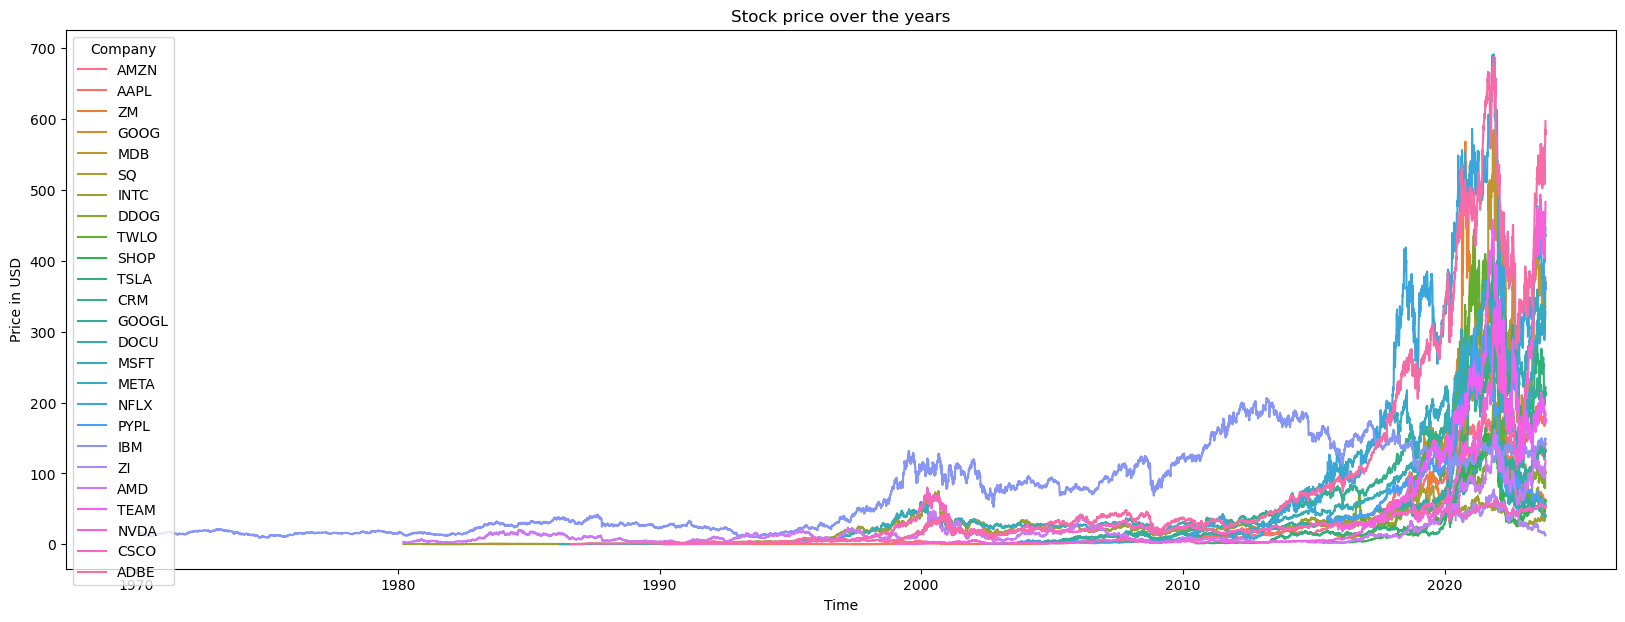

In [6]:
import seaborn as sns
plt.figure(figsize=(20,7))
plt.title("Stock price over the years")
sns.lineplot(x=df['Date'],y=df['Close'],hue=df['Company'])
plt.ylabel("Price")
plt.xlabel("Time")

In [11]:
def create_train_test_data(data):
    # Create Training Data
    train_len=math.ceil(len(data)*0.9)
    train_data=data[0:train_len,:]

    interval=60
    x_train=[]
    y_train=[]

    for i in range(interval,len(train_data)):
        x_train.append(train_data[i-interval:i,0])
        y_train.append(train_data[i,0])
    
    # Create Test Data
    test_data=data[train_len-interval:,:]

    x_test=[]
    y_test=data.reshape(-1,1)[train_len:,:]
    for i in range(interval,len(test_data)):
        x_test.append(test_data[i-interval:i,0])
    
    # Data Preparation
    x_train,y_train=np.array(x_train),np.array(y_train)
    x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    return x_train,y_train,x_test,y_test

In [14]:
def create_table(x_train,y_train,x_test,y_test,model,data):
    # Testing
    interval=60
    train_len=math.ceil(len(data)*0.9)
    x_test=np.array(x_test)
    x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    predictions=model.predict(x_test)

    train_data=df1[0:train_len]
    train_data['Category']='Data'
    valid_data=df1[train_len:]
    valid_data['Category']='Testing Data'
    valid_data['predictions']=predictions

    # Append the new rows to the DataFrame

    final_data = pd.concat([train_data, valid_data], ignore_index=True)
    return final_data

In [15]:
final_table=pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'date','Company', 'Category', 'predictions'])
for company in df['Company'].unique():
    print("Company: ",company)
    df1=df[df['Company']==company]
    data=df1['Close'].values.reshape(-1,1)

    x_train,y_train,x_test,y_test=create_train_test_data(data)

    # Create Model
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(50))
    model.add(Dense(1))
    
    # Train Model
    model.compile(optimizer="adam",loss="mean_squared_error")
    model.fit(x_train,y_train,batch_size=64,epochs=10)

    final_table=pd.concat([final_table,create_table(x_train,y_train,x_test,y_test,model,data)],ignore_index=True)

Epoch 1/10
93/93 [==============================] - 9s 56ms/step - loss: 1088.8054
Epoch 2/10
93/93 [==============================] - 5s 53ms/step - loss: 157.3331
Epoch 3/10
93/93 [==============================] - 5s 53ms/step - loss: 34.6405
Epoch 4/10
93/93 [==============================] - 5s 54ms/step - loss: 4.8585
Epoch 5/10
93/93 [==============================] - 5s 51ms/step - loss: 2.8195
Epoch 6/10
93/93 [==============================] - 5s 53ms/step - loss: 2.3969
Epoch 7/10
93/93 [==============================] - 5s 55ms/step - loss: 3.8263
Epoch 8/10
93/93 [==============================] - 5s 54ms/step - loss: 1.9494
Epoch 9/10
93/93 [==============================] - 5s 52ms/step - loss: 2.0339
Epoch 10/10
1/1 [==============================] - 0s 31ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 29ms/step
Epoch 1/10
152/152 [==============================] - 12s 54ms/step - loss: 32.1149
Epoch 2/10
152/152 [==============================] - 8s 54ms/step - loss: 0.6864
Epoch 3/10
152/152 [==============================] - 8s 53ms/step - loss: 0.3606
Epoch 4/10
152/152 [==============================] - 8s 53ms/step - loss: 0.2190
Epoch 5/10
152/152 [==============================] - 8s 53ms/step - loss: 0.1789
Epoch 6/10
152/152 [==============================] - 8s 55ms/step - loss: 0.1784
Epoch 7/10
152/152 [==============================] - 8s 54ms/step - loss: 0.1379
Epoch 8/10
152/152 [==============================] - 8s 54ms/step - loss: 0.1238
Epoch 9/10
152/152 [==============================] - 8s 54ms/step - loss: 0.1165
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 28ms/step
Epoch 1/10
16/16 [==============================] - 4s 57ms/step - loss: 53535.3711
Epoch 2/10
16/16 [==============================] - 1s 56ms/step - loss: 50680.2852
Epoch 3/10
16/16 [==============================] - 1s 55ms/step - loss: 46349.2109
Epoch 4/10
16/16 [==============================] - 1s 55ms/step - loss: 41493.3516
Epoch 5/10
16/16 [==============================] - 1s 52ms/step - loss: 36544.7148
Epoch 6/10
16/16 [==============================] - 1s 52ms/step - loss: 31702.3496
Epoch 7/10
16/16 [==============================] - 1s 51ms/step - loss: 27433.7520
Epoch 8/10
16/16 [==============================] - 1s 51ms/step - loss: 23879.0859
Epoch 9/10
16/16 [==============================] - 1s 57ms/step - loss: 21100.4629
Epoch 10/10
1/1 [==============================] - 0s 28ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 28ms/step
Epoch 1/10
68/68 [==============================] - 7s 55ms/step - loss: 1212.6429
Epoch 2/10
68/68 [==============================] - 4s 54ms/step - loss: 307.6784
Epoch 3/10
68/68 [==============================] - 4s 53ms/step - loss: 62.1930
Epoch 4/10
68/68 [==============================] - 3s 51ms/step - loss: 13.8239
Epoch 5/10
68/68 [==============================] - 4s 52ms/step - loss: 4.9215
Epoch 6/10
68/68 [==============================] - 4s 56ms/step - loss: 2.3133
Epoch 7/10
68/68 [==============================] - 4s 52ms/step - loss: 1.6303
Epoch 8/10
68/68 [==============================] - 4s 53ms/step - loss: 1.4527
Epoch 9/10
68/68 [==============================] - 4s 52ms/step - loss: 1.4530
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 32ms/step
Epoch 1/10
21/21 [==============================] - 5s 52ms/step - loss: 63115.4570
Epoch 2/10
21/21 [==============================] - 1s 53ms/step - loss: 58274.8789
Epoch 3/10
21/21 [==============================] - 1s 53ms/step - loss: 51256.4805
Epoch 4/10
21/21 [==============================] - 1s 51ms/step - loss: 43743.5078
Epoch 5/10
21/21 [==============================] - 1s 51ms/step - loss: 36391.3594
Epoch 6/10
21/21 [==============================] - 1s 51ms/step - loss: 29857.0469
Epoch 7/10
21/21 [==============================] - 1s 52ms/step - loss: 24400.2441
Epoch 8/10
21/21 [==============================] - 1s 55ms/step - loss: 20353.0645
Epoch 9/10
21/21 [==============================] - 1s 56ms/step - loss: 15691.1172
Epoch 10/10
1/1 [==============================] - 0s 32ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 30ms/step
Epoch 1/10
28/28 [==============================] - 5s 55ms/step - loss: 12367.0781
Epoch 2/10
28/28 [==============================] - 2s 55ms/step - loss: 9631.3604
Epoch 3/10
28/28 [==============================] - 2s 55ms/step - loss: 6870.2354
Epoch 4/10
28/28 [==============================] - 2s 56ms/step - loss: 4604.4688
Epoch 5/10
28/28 [==============================] - 2s 59ms/step - loss: 2887.7136
Epoch 6/10
28/28 [==============================] - 2s 58ms/step - loss: 1691.2239
Epoch 7/10
28/28 [==============================] - 2s 56ms/step - loss: 919.2111
Epoch 8/10
28/28 [==============================] - 2s 56ms/step - loss: 476.7146
Epoch 9/10
28/28 [==============================] - 2s 55ms/step - loss: 264.2577
Epoch 10/10
1/1 [==============================] - 0s 27ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 22ms/step
Epoch 1/10
154/154 [==============================] - 12s 57ms/step - loss: 88.4721
Epoch 2/10
154/154 [==============================] - 9s 56ms/step - loss: 2.1728
Epoch 3/10
154/154 [==============================] - 9s 55ms/step - loss: 1.0224
Epoch 4/10
154/154 [==============================] - 8s 54ms/step - loss: 0.7855
Epoch 5/10
154/154 [==============================] - 8s 55ms/step - loss: 0.6758
Epoch 6/10
154/154 [==============================] - 8s 54ms/step - loss: 0.5954
Epoch 7/10
154/154 [==============================] - 8s 55ms/step - loss: 0.5057
Epoch 8/10
154/154 [==============================] - 8s 54ms/step - loss: 0.5228
Epoch 9/10
154/154 [==============================] - 8s 54ms/step - loss: 0.5357
Epoch 10/10
1/1 [==============================] - 0s 28ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 34ms/step
Epoch 1/10
14/14 [==============================] - 4s 51ms/step - loss: 10074.3711
Epoch 2/10
14/14 [==============================] - 1s 53ms/step - loss: 8788.1875
Epoch 3/10
14/14 [==============================] - 1s 56ms/step - loss: 7080.3486
Epoch 4/10
14/14 [==============================] - 1s 52ms/step - loss: 5294.1895
Epoch 5/10
14/14 [==============================] - 1s 52ms/step - loss: 3780.9541
Epoch 6/10
14/14 [==============================] - 1s 52ms/step - loss: 2597.2273
Epoch 7/10
14/14 [==============================] - 1s 51ms/step - loss: 1824.4596
Epoch 8/10
14/14 [==============================] - 1s 54ms/step - loss: 1407.5497
Epoch 9/10
14/14 [==============================] - 1s 51ms/step - loss: 1259.2603
Epoch 10/10
1/1 [==============================] - 0s 39ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 31ms/step
Epoch 1/10
26/26 [==============================] - 6s 52ms/step - loss: 31103.9980
Epoch 2/10
26/26 [==============================] - 1s 53ms/step - loss: 26806.7246
Epoch 3/10
26/26 [==============================] - 1s 52ms/step - loss: 21346.0078
Epoch 4/10
26/26 [==============================] - 1s 52ms/step - loss: 16983.2637
Epoch 5/10
26/26 [==============================] - 1s 52ms/step - loss: 14231.6270
Epoch 6/10
26/26 [==============================] - 1s 53ms/step - loss: 11140.3672
Epoch 7/10
26/26 [==============================] - 1s 54ms/step - loss: 7451.7183
Epoch 8/10
26/26 [==============================] - 1s 56ms/step - loss: 4788.0894
Epoch 9/10
26/26 [==============================] - 1s 56ms/step - loss: 2911.6726
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 28ms/step
Epoch 1/10
30/30 [==============================] - 5s 54ms/step - loss: 3494.1997
Epoch 2/10
30/30 [==============================] - 2s 52ms/step - loss: 2203.7920
Epoch 3/10
30/30 [==============================] - 2s 53ms/step - loss: 1089.3816
Epoch 4/10
30/30 [==============================] - 2s 53ms/step - loss: 433.9687
Epoch 5/10
30/30 [==============================] - 2s 56ms/step - loss: 173.8889
Epoch 6/10
30/30 [==============================] - 2s 55ms/step - loss: 87.2991
Epoch 7/10
30/30 [==============================] - 2s 52ms/step - loss: 45.7940
Epoch 8/10
30/30 [==============================] - 2s 50ms/step - loss: 28.9186
Epoch 9/10
30/30 [==============================] - 2s 53ms/step - loss: 25.5551
Epoch 10/10
1/1 [==============================] - 0s 31ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 28ms/step
Epoch 1/10
47/47 [==============================] - 6s 59ms/step - loss: 10110.4932
Epoch 2/10
47/47 [==============================] - 3s 56ms/step - loss: 6858.1030
Epoch 3/10
47/47 [==============================] - 3s 53ms/step - loss: 3599.1580
Epoch 4/10
47/47 [==============================] - 2s 52ms/step - loss: 1610.5854
Epoch 5/10
47/47 [==============================] - 2s 52ms/step - loss: 841.8286
Epoch 6/10
47/47 [==============================] - 2s 52ms/step - loss: 541.4984
Epoch 7/10
47/47 [==============================] - 3s 55ms/step - loss: 411.0489
Epoch 8/10
47/47 [==============================] - 3s 57ms/step - loss: 390.6531
Epoch 9/10
47/47 [==============================] - 3s 54ms/step - loss: 347.3230
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 28ms/step
Epoch 1/10
68/68 [==============================] - 7s 58ms/step - loss: 7655.9834
Epoch 2/10
68/68 [==============================] - 4s 53ms/step - loss: 3034.8486
Epoch 3/10
68/68 [==============================] - 4s 56ms/step - loss: 897.1088
Epoch 4/10
68/68 [==============================] - 4s 54ms/step - loss: 341.4709
Epoch 5/10
68/68 [==============================] - 4s 54ms/step - loss: 130.7403
Epoch 6/10
68/68 [==============================] - 4s 55ms/step - loss: 73.5588
Epoch 7/10
68/68 [==============================] - 3s 51ms/step - loss: 53.9504
Epoch 8/10
68/68 [==============================] - 4s 53ms/step - loss: 39.4569
Epoch 9/10
68/68 [==============================] - 4s 55ms/step - loss: 27.7900
Epoch 10/10
1/1 [==============================] - 0s 26ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 27ms/step
Epoch 1/10
68/68 [==============================] - 7s 52ms/step - loss: 1236.4108
Epoch 2/10
68/68 [==============================] - 4s 53ms/step - loss: 293.9405
Epoch 3/10
68/68 [==============================] - 4s 55ms/step - loss: 62.3192
Epoch 4/10
68/68 [==============================] - 4s 53ms/step - loss: 17.1922
Epoch 5/10
68/68 [==============================] - 4s 51ms/step - loss: 5.7870
Epoch 6/10
68/68 [==============================] - 4s 52ms/step - loss: 3.9553
Epoch 7/10
68/68 [==============================] - 4s 55ms/step - loss: 1.7826
Epoch 8/10
68/68 [==============================] - 3s 51ms/step - loss: 1.6440
Epoch 9/10
68/68 [==============================] - 4s 52ms/step - loss: 1.3696
Epoch 10/10
1/1 [==============================] - 0s 34ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 29ms/step
Epoch 1/10
19/19 [==============================] - 6s 55ms/step - loss: 20582.4570
Epoch 2/10
19/19 [==============================] - 1s 53ms/step - loss: 17971.6191
Epoch 3/10
19/19 [==============================] - 1s 53ms/step - loss: 14710.7236
Epoch 4/10
19/19 [==============================] - 1s 52ms/step - loss: 11716.8701
Epoch 5/10
19/19 [==============================] - 1s 55ms/step - loss: 9428.4746
Epoch 6/10
19/19 [==============================] - 1s 53ms/step - loss: 7929.8154
Epoch 7/10
19/19 [==============================] - 1s 54ms/step - loss: 7175.7144
Epoch 8/10
19/19 [==============================] - 1s 52ms/step - loss: 6917.4424
Epoch 9/10
19/19 [==============================] - 1s 53ms/step - loss: 6860.1772
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 31ms/step
Epoch 1/10
133/133 [==============================] - 11s 52ms/step - loss: 627.4965
Epoch 2/10
133/133 [==============================] - 7s 55ms/step - loss: 40.2940
Epoch 3/10
133/133 [==============================] - 7s 53ms/step - loss: 5.9506
Epoch 4/10
133/133 [==============================] - 7s 53ms/step - loss: 2.8205
Epoch 5/10
133/133 [==============================] - 7s 55ms/step - loss: 2.5048
Epoch 6/10
133/133 [==============================] - 7s 52ms/step - loss: 1.8078
Epoch 7/10
133/133 [==============================] - 7s 56ms/step - loss: 1.5368
Epoch 8/10
133/133 [==============================] - 7s 54ms/step - loss: 1.2318
Epoch 9/10
133/133 [==============================] - 7s 56ms/step - loss: 1.0383
Epoch 10/10
1/1 [==============================] - 0s 28ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 26ms/step
Epoch 1/10
40/40 [==============================] - 6s 52ms/step - loss: 28058.3770
Epoch 2/10
40/40 [==============================] - 2s 52ms/step - loss: 19310.7285
Epoch 3/10
40/40 [==============================] - 2s 53ms/step - loss: 11484.4893
Epoch 4/10
40/40 [==============================] - 2s 52ms/step - loss: 5952.7886
Epoch 5/10
40/40 [==============================] - 2s 52ms/step - loss: 3028.1748
Epoch 6/10
40/40 [==============================] - 2s 51ms/step - loss: 1745.5129
Epoch 7/10
40/40 [==============================] - 2s 56ms/step - loss: 1038.6682
Epoch 8/10
40/40 [==============================] - 2s 55ms/step - loss: 617.2103
Epoch 9/10
40/40 [==============================] - 2s 52ms/step - loss: 382.8707
Epoch 10/10
1/1 [==============================] - 0s 31ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 29ms/step
Epoch 1/10
76/76 [==============================] - 8s 54ms/step - loss: 31026.1934
Epoch 2/10
76/76 [==============================] - 4s 54ms/step - loss: 18601.8652
Epoch 3/10
76/76 [==============================] - 4s 52ms/step - loss: 8057.0752
Epoch 4/10
76/76 [==============================] - 4s 54ms/step - loss: 2963.8433
Epoch 5/10
76/76 [==============================] - 4s 56ms/step - loss: 1243.3469
Epoch 6/10
76/76 [==============================] - 4s 55ms/step - loss: 478.9127
Epoch 7/10
76/76 [==============================] - 4s 53ms/step - loss: 222.6932
Epoch 8/10
76/76 [==============================] - 4s 55ms/step - loss: 127.9034
Epoch 9/10
76/76 [==============================] - 4s 56ms/step - loss: 84.8389
Epoch 10/10
1/1 [==============================] - ETA: 0s

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 29ms/step
Epoch 1/10
29/29 [==============================] - 5s 53ms/step - loss: 15991.3545
Epoch 2/10
29/29 [==============================] - 2s 52ms/step - loss: 12267.5215
Epoch 3/10
29/29 [==============================] - 2s 56ms/step - loss: 8469.8135
Epoch 4/10
29/29 [==============================] - 2s 54ms/step - loss: 6092.0000
Epoch 5/10
29/29 [==============================] - 1s 52ms/step - loss: 5084.6055
Epoch 6/10
29/29 [==============================] - 1s 51ms/step - loss: 4655.2334
Epoch 7/10
29/29 [==============================] - 2s 52ms/step - loss: 4261.1372
Epoch 8/10
29/29 [==============================] - 1s 51ms/step - loss: 2474.6892
Epoch 9/10
29/29 [==============================] - 2s 53ms/step - loss: 1295.1075
Epoch 10/10
1/1 [==============================] - 0s 28ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 23ms/step
Epoch 1/10
191/191 [==============================] - 15s 52ms/step - loss: 2425.7419
Epoch 2/10
191/191 [==============================] - 10s 54ms/step - loss: 30.3788
Epoch 3/10
191/191 [==============================] - 10s 54ms/step - loss: 5.9559
Epoch 4/10
191/191 [==============================] - 10s 54ms/step - loss: 4.3156
Epoch 5/10
191/191 [==============================] - 10s 54ms/step - loss: 3.2789
Epoch 6/10
191/191 [==============================] - 10s 53ms/step - loss: 2.9441
Epoch 7/10
191/191 [==============================] - 10s 53ms/step - loss: 2.9203
Epoch 8/10
191/191 [==============================] - 10s 54ms/step - loss: 3.1094
Epoch 9/10
191/191 [==============================] - 10s 53ms/step - loss: 2.5773
Epoch 10/10
1/1 [==============================] - 0s 47ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 20ms/step
Epoch 1/10
12/12 [==============================] - 4s 54ms/step - loss: 1971.0005
Epoch 2/10
12/12 [==============================] - 1s 55ms/step - loss: 1530.1195
Epoch 3/10
12/12 [==============================] - 1s 53ms/step - loss: 983.3792
Epoch 4/10
12/12 [==============================] - 1s 53ms/step - loss: 491.8999
Epoch 5/10
12/12 [==============================] - 1s 54ms/step - loss: 244.6725
Epoch 6/10
12/12 [==============================] - 1s 55ms/step - loss: 184.9621
Epoch 7/10
12/12 [==============================] - 1s 51ms/step - loss: 186.0703
Epoch 8/10
12/12 [==============================] - 1s 51ms/step - loss: 183.3624
Epoch 9/10
12/12 [==============================] - 1s 51ms/step - loss: 178.2727
Epoch 10/10
1/1 [==============================] - 0s 29ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 25ms/step
Epoch 1/10
154/154 [==============================] - 12s 53ms/step - loss: 24.5248
Epoch 2/10
154/154 [==============================] - 8s 52ms/step - loss: 0.8261
Epoch 3/10
154/154 [==============================] - 8s 53ms/step - loss: 0.5093
Epoch 4/10
154/154 [==============================] - 8s 52ms/step - loss: 0.4178
Epoch 5/10
154/154 [==============================] - 8s 53ms/step - loss: 0.3757
Epoch 6/10
154/154 [==============================] - 8s 53ms/step - loss: 0.3370
Epoch 7/10
154/154 [==============================] - 8s 54ms/step - loss: 0.3205
Epoch 8/10
154/154 [==============================] - 8s 52ms/step - loss: 0.3506
Epoch 9/10
154/154 [==============================] - 8s 53ms/step - loss: 0.3061
Epoch 10/10
1/1 [==============================] - 0s 26ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 28ms/step
Epoch 1/10
28/28 [==============================] - 5s 51ms/step - loss: 28589.0820
Epoch 2/10
28/28 [==============================] - 1s 51ms/step - loss: 23814.9902
Epoch 3/10
28/28 [==============================] - 1s 50ms/step - loss: 18264.8477
Epoch 4/10
28/28 [==============================] - 1s 52ms/step - loss: 13815.9111
Epoch 5/10
28/28 [==============================] - 1s 52ms/step - loss: 11317.7568
Epoch 6/10
28/28 [==============================] - 1s 51ms/step - loss: 7715.1499
Epoch 7/10
28/28 [==============================] - 1s 50ms/step - loss: 4775.2036
Epoch 8/10
28/28 [==============================] - 1s 51ms/step - loss: 3085.1011
Epoch 9/10
28/28 [==============================] - 1s 50ms/step - loss: 2064.5212
Epoch 10/10
1/1 [==============================] - 0s 18ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 25ms/step
Epoch 1/10
87/87 [==============================] - 8s 50ms/step - loss: 667.3842
Epoch 2/10
87/87 [==============================] - 4s 51ms/step - loss: 100.2961
Epoch 3/10
87/87 [==============================] - 5s 53ms/step - loss: 11.2779
Epoch 4/10
87/87 [==============================] - 4s 51ms/step - loss: 5.0182
Epoch 5/10
87/87 [==============================] - 4s 52ms/step - loss: 3.5925
Epoch 6/10
87/87 [==============================] - 4s 52ms/step - loss: 3.8927
Epoch 7/10
87/87 [==============================] - 5s 53ms/step - loss: 4.4478
Epoch 8/10
87/87 [==============================] - 4s 50ms/step - loss: 4.2537
Epoch 9/10
87/87 [==============================] - 4s 51ms/step - loss: 3.3295
Epoch 10/10
1/1 [==============================] - 0s 35ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 26ms/step
Epoch 1/10
119/119 [==============================] - 9s 51ms/step - loss: 151.6585
Epoch 2/10
119/119 [==============================] - 6s 53ms/step - loss: 4.0261
Epoch 3/10
119/119 [==============================] - 6s 51ms/step - loss: 1.4053
Epoch 4/10
119/119 [==============================] - 6s 52ms/step - loss: 1.0918
Epoch 5/10
119/119 [==============================] - 6s 52ms/step - loss: 0.9727
Epoch 6/10
119/119 [==============================] - 6s 51ms/step - loss: 0.8342
Epoch 7/10
119/119 [==============================] - 6s 53ms/step - loss: 0.7288
Epoch 8/10
119/119 [==============================] - 6s 51ms/step - loss: 0.7164
Epoch 9/10
119/119 [==============================] - 6s 52ms/step - loss: 0.6456
Epoch 10/10
1/1 [==============================] - 0s 23ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 30ms/step
Epoch 1/10
132/132 [==============================] - 11s 54ms/step - loss: 3766.7151
Epoch 2/10
132/132 [==============================] - 7s 53ms/step - loss: 638.3281
Epoch 3/10
132/132 [==============================] - 7s 54ms/step - loss: 85.0594
Epoch 4/10
132/132 [==============================] - 7s 52ms/step - loss: 41.9676
Epoch 5/10
132/132 [==============================] - 7s 52ms/step - loss: 30.0187
Epoch 6/10
132/132 [==============================] - 7s 54ms/step - loss: 24.8605
Epoch 7/10
132/132 [==============================] - 7s 53ms/step - loss: 16.6998
Epoch 8/10
132/132 [==============================] - 7s 54ms/step - loss: 15.9778
Epoch 9/10
132/132 [==============================] - 7s 52ms/step - loss: 9.2748
Epoch 10/10
1/1 [==============================] - ETA: 0s

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Category']='Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Category']='Testing Data'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1816\1201040816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


1/1 [==============================] - 0s 33ms/step


In [18]:
final_table.to_csv("combined_stocks_with_predictions.csv")

In [ ]:
sns.lineplot(x='Date',y='Close',hue='Category',data=final_data.iloc[-60:])
plt.show()

In [ ]:
print(pd.__version__)

In [ ]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Stock Price",fontsize=18)
plt.plot(final_data['Close'])
plt.plot(final_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Stock Price",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()